In [2]:
import pandas as pd
import string as st
import math
import matplotlib
import numpy as np
#from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# load dataset as pandas df
data_file = '../data/180213_cogsci_journal_unprocessed.csv'

df_pd = pd.read_csv(data_file)

# fix the article index column name
df_pd.rename(columns={"Unnamed: 0": "Article Index"}, inplace=True)

# NOTE:
# don't fill the column with garbage data, just remove it
#df_pd = df_pd.fillna("Other") 

# drop all rows where 'article_name' is nan
df_pd = df_pd.dropna(how='all', subset=['article_name'])
# need to realign indices to start at 0
df_pd.index=range(len(df_pd.index))

In [5]:
affiliations = df_pd["author_affiliations"].str.lower()
#columns=['Neuro_Science','Psychology','Philosophy','Anthropology','Linguistics','Artificial Intelligence', 'CS', 'CogSci', 'Other', 'Missing', 'Total']
# hexaCount=pd.DataFrame(0, index=np.arange(len(affiliations)), columns=columns)

aff_df = df_pd["author_affiliations"].str.lower()
affiliations = affiliations.tolist()
#aff_df
#df_pd["author_affiliations"]
#print(type(hexaCount[1]))
#hexaCount

In [7]:
# CSV file where each row is a publication type.
# first element of every row is the name of the type

art_types = '../data/Article_Types_V1.csv'
df_art_types = pd.read_csv(art_types, sep=',', header= None)


### Consolidate Publication Types

In [8]:

lst=[[] for _ in range(len(df_art_types))] # makes a list of lists where each sublist is an article type. elem 0 is name, rest elements

#populates list with csv data
for i in range(df_art_types.shape[1]):
        for j in range(df_art_types.shape[0]):
            lst[j].append(df_art_types[i][j])
#removes nan from list of list (it is square by default)           
for a in range(len(lst)):
    lst[a] = [x for x in lst[a] if str(x) != 'nan']

In [9]:
#This function will replace all the inconsistent types of our data set with consolidated types of interest
def ConsolidateType(lst,df_pd):

    oldTypes = df_pd.article_type.values
    newTypes = []
    for i in range(len(oldTypes)):
        # NOTE: index 0 of each sublist of lst is the name of that publication type, not a filter term
        
        for j in range(len(lst)):
            
            if oldTypes[i] in lst[j][1:]:
                
                newTypes.append(lst[j][0])
                break
            elif j == len(lst)-1:
                
                newTypes.append(np.nan)
                
                
    df_pd.article_type = newTypes

In [10]:
ConsolidateType(lst,df_pd)

In [11]:
# removes unwanted types from our dataset
df_pd = df_pd.dropna(how='any', subset=['article_type'])

In [12]:
df_pd.to_csv("../data/Consolidated_Types")

## Affiliations

In [44]:
# This cell will make arrays of hexagonal terms from a csv file
aff_types = pd.read_csv("../data/Affiliation_types_V1.csv", sep=',', header=None)

aff_lst=[[] for _ in range(len(aff_types))] # makes a list of lists where each sublist is a hexagonal type. elem 0 is name, rest elements

#populates list with csv data
for i in range(aff_types.shape[1]):
        for j in range(aff_types.shape[0]):
            aff_lst[j].append(aff_types[i][j])
#removes nan from list of list (it is square by default)           
for a in range(len(aff_lst)):
    aff_lst[a] = [x for x in aff_lst[a] if str(x) != 'nan']
    
#aff_df[i] in aff_lst[j][1:]
#if any(x in str for x in a):
#any(x in aff_lst[0][0:] for x in aff_d

In [45]:
columns = []
for cat in aff_lst:
    columns.append(cat[0])

columns.append('other')
columns.append('missing')
columns.append('total')

In [46]:
#This function will replace all the inconsistent types of our data set with consolidated types of interest
def Consolidate_hex(aff_lst,aff_df, columns):

     # initialize empty hexacount df
    hexaCount=pd.DataFrame(0, index=np.arange(len(aff_df)), columns=columns)

    for i in range(len(aff_df)):
        # NOTE: index 0 of each sublist of lst is the name of that publication type, not a filter term
        if pd.isnull(aff_df.iloc[i]):
            # skip because it's nan
            hexaCount["missing"].iloc[i] = 1
            continue
        
        for j in range(len(aff_lst)):
            for k in range(len(aff_lst[j])):
                
                if aff_lst[j][k] in aff_df.iloc[i]:
                    
                    hexaCount.iloc[i][aff_lst[j][0]] += 1
                    continue
        
        # append 1 to other if the row is all 0s here
        if hexaCount.iloc[i].sum()<1.:            
                hexaCount["other"].iloc[i] = 1
            
#                 elif j == len(lst)-1:
#                     print(aff_lst[j])
#                     hexaCount['Other'].iloc[j] += 1
        hexaCount["total"].iloc[i] = hexaCount.iloc[i].sum()

    return hexaCount        

In [47]:
# Build Hexagon
hexaCount = Consolidate_hex(aff_lst, aff_df, columns)

In [48]:
#hexaCount

In [49]:
# def department_count (aff_df, columns):
#     # needs two inputs: the affiliation list (aff_df), and column names (colums)
    
#     # initialize empty hexacount df
#     hexaCount=pd.DataFrame(0, index=np.arange(len(aff_df)), columns=columns)
    
#     # loop through
#     for i in range(len(aff_df)):
#         # ideally, we want to also move this categories to an external datafile
#         if pd.isnull(aff_df.iloc[i]):
#             # checking if the affiliation is just empty
#             hexaCount['Missing'].iloc[i] =1
        
#         else:
#             # not NaN, proceed to hexagonize
#             if "anthropology" in aff_df.iloc[i]:
#                 hexaCount["Anthropology"].iloc[i] += 1

#             if "artificial intelligence" in aff_df.iloc[i]:
#                 hexaCount["Artificial Intelligence"].iloc[i] += 1    

#             if "linguistic" in aff_df.iloc[i]:
#                 hexaCount["Linguistics"].iloc[i] += 1

#             if "neuro science" in aff_df.iloc[i] or "neuroscience" in aff_df.iloc[i]:
#                 hexaCount["Neuro_Science"].iloc[i] += 1

#             if "philosophy" in aff_df.iloc[i]:
#                 hexaCount["Philosophy"].iloc[i] += 1

#             if "psychology" in aff_df.iloc[i]:
#                 hexaCount["Psychology"].iloc[i] += 1
            
#             if "computer" in aff_df.iloc[i]:
#                 hexaCount["CS"].iloc[i] += 1

#             if "cognitive science" in aff_df.iloc[i]:
#                 hexaCount["CogSci"].iloc[i] += 1
                
#             if hexaCount.iloc[i].sum()<1.:            
#                 hexaCount["Other"].iloc[i] = 1
    
#             hexaCount["Total"].iloc[i] = hexaCount.iloc[i].sum()

#     return hexaCount

In [50]:
# # building the hexagon
# hexaCount = department_count(aff_df, columns)

### Check to see which affiliations got filed under which category

In [51]:
hexaCount.iloc[759]

anthropology               2
artificial intelligence    0
linguistcs                 0
neuroscience               0
philosophy                 0
psychology                 3
computer science           0
cognitive science          0
other                      0
missing                    0
total                      5
Name: 759, dtype: int64

In [52]:
pd.options.display.max_colwidth = 200
print(columns)
query_hex = columns[3]
cols_to_disp=['author_affiliations']
print('Querying:', query_hex, '\n---\n')
print(df_pd[cols_to_disp].loc[hexaCount[query_hex]==1].to_string())

['anthropology', 'artificial intelligence', 'linguistcs', 'neuroscience', 'philosophy', 'psychology', 'computer science', 'cognitive science', 'other', 'missing', 'total']
Querying: neuroscience 
---

                                                                                                                                                                                          author_affiliations
475                                                                                                                               Carnegie Mellon University and the Center for the Neural Basis of Cognition
523                                              Department of Neurology, University of Maryland School of Medicine, 12-011 Bressler Research Building, 655 W Baltimore Street, Baltimore, MD 21201-1559, USA
530                Department of Psychology, Franklin & Marshall College, Lancaster, PA 17604, USA\n             School of Cognitive Science, Hampshire College, Amherst, MA 01002, U

### Append hexaCount to original dataframe

In [53]:
pd_concat = pd.concat([df_pd, hexaCount], axis=1)

In [54]:
pd_concat

,article_index,article_name,year,volume,issue,pages,month,doi,article_type,authors,...,artificial intelligence,linguistcs,neuroscience,philosophy,psychology,computer science,cognitive science,other,missing,total
0,2.0,Why Cognitive Science,1977.0,1.0,1,1-2,January,10.1207/s15516709cog0101_1,Original_Article,Allan Collins,...,0,0,0,0,0,0,0,0,1,0
1,3.0,"An Overview of KRL, a Knowledge Representation Language",1977.0,1.0,1,3-46,January,10.1207/s15516709cog0101_2,Original_Article,"Daniel G. Bobrow1,* and\nTerry Winograd2",...,0,0,0,0,0,0,0,1,0,1
2,4.0,Human and Computational Question Answering†,1977.0,1.0,1,47-73,January,10.1207/s15516709cog0101_3,Original_Article,Wendy Lehnert*,...,0,0,0,0,0,0,0,1,0,1
3,5.0,Definite Descriptions and Semantic Memory†,1977.0,1.0,1,74-83,January,10.1207/s15516709cog0101_4,Original_Article,Andrew Ortony* and\nRichard C. Anderson,...,0,0,0,0,0,0,0,1,0,1
4,6.0,"Artificial Intelligence, Language, and the Study of Knowledge†‡",1977.0,1.0,1,84-123,January,10.1207/s15516709cog0101_5,Original_Article,Professor Ira Goldstein* and\nSeymour Papert,...,0,0,0,0,0,1,0,0,0,1
5,7.0,Induction of Augmented Transition Networks†,1977.0,1.0,2,125-157,April,10.1207/s15516709cog0102_1,Original_Article,John R. Anderson*,...,0,0,0,0,0,0,0,1,0,1
6,8.0,Decision Theory and Artificial Intelligence II: The Hungry Monkey†,1977.0,1.0,2,158-192,April,10.1207/s15516709cog0102_2,Original_Article,"Jerome A. Feldman1,* and\nRobert F. Sproull2",...,0,0,0,0,0,0,0,1,0,1
7,9.0,Problem Solving in Semantically Rich Domains: An Example from Engineering Thermodynamics†,1977.0,1.0,2,193-215,April,10.1207/s15516709cog0102_3,Original_Article,R. Bhaskar and\nHerbert A. Simon*,...,0,0,0,0,0,0,0,1,0,1
8,10.0,"Verbs, Time, and Modality†",1977.0,1.0,2,216-234,April,10.1207/s15516709cog0102_4,Original_Article,M. J. Steedman*,...,0,0,0,0,0,0,0,1,0,1
9,11.0,What Sort of Taxonomy of Causation Do We Need for Language Understanding?†,1977.0,1.0,3,235-264,July,10.1207/s15516709cog0103_1,Original_Article,Yorick Wilks,...,0,0,0,0,0,0,0,1,0,1


### Visualize
Now we can visualize hexagon values.

Text(0.5,1,'Sum over all years')

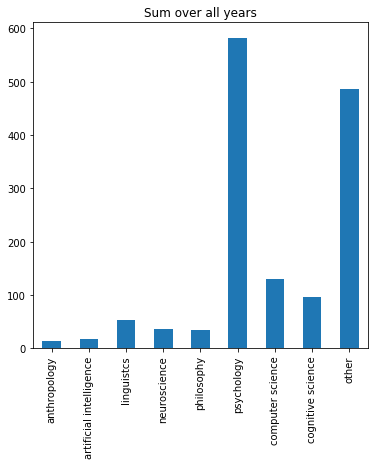

In [55]:
#pd_concat[['year'] + columns]

# plot hexagon normalized by total (0:-2 indexing to exclude columns missing and total)
hex_normed = pd_concat[columns[:-2]].div(pd_concat['total'], axis='rows')
hex_normed.sum().plot(kind='bar', figsize=(6,6))
plt.xticks(rotation=90)
plt.title('Sum over all years')

In [56]:
hex_normed.groupby(pd_concat['year']).size()

year
1977.0     15
1978.0     17
1979.0     16
1980.0     17
1981.0     14
1982.0     11
1983.0     12
1984.0     16
1985.0     17
1986.0     17
1987.0     18
1988.0     17
1989.0     21
1990.0     20
1991.0     16
1992.0     16
1993.0     27
1994.0     16
1995.0     15
1996.0     15
1997.0     14
1998.0     16
1999.0     20
2000.0     20
2001.0     28
2002.0     27
2003.0     40
2004.0     46
2005.0     40
2006.0     42
2007.0     34
2008.0     48
2009.0     63
2010.0     68
2011.0     58
2012.0     70
2013.0     62
2014.0     65
2015.0     81
2016.0     84
2017.0    151
2018.0     13
dtype: int64

Text(0.5,1,'Hexagon normed, and proportion per year')

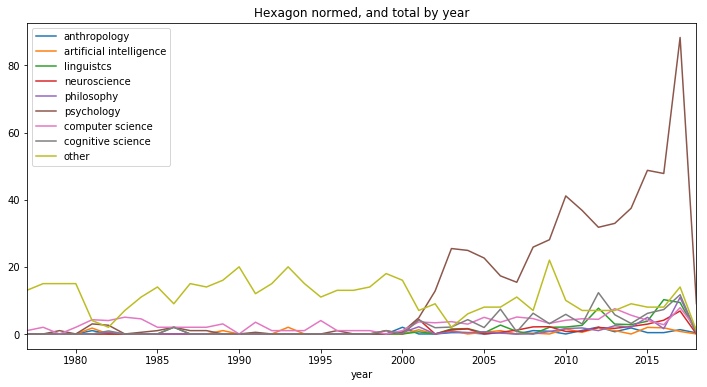

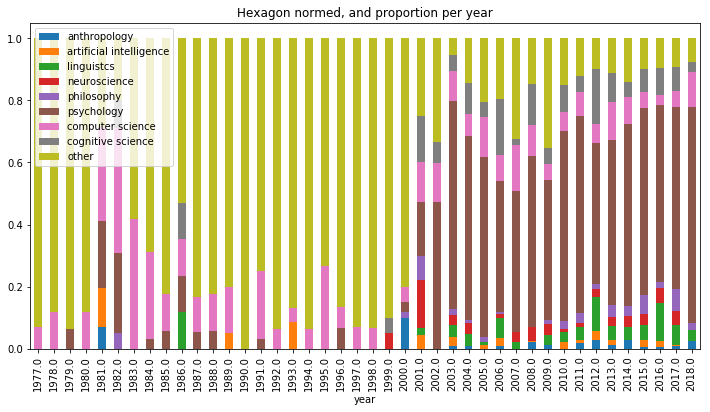

In [57]:
# this plots sum per year, which means it sums to the total # of articles written that year
hex_normed.groupby(pd_concat['year']).sum().plot(figsize=(12,6))
plt.title('Hexagon normed, and total by year')

# this plots mean per year, which means it normalizes by the number of articles written per year
#hex_normed.groupby(pd_concat['year']).mean().plot(figsize=(12,6))
hex_normed.groupby(pd_concat['year']).mean().plot(kind='bar', stacked=True, figsize=(12,6))
#plt.yscale('log')
plt.title('Hexagon normed, and proportion per year')

# pd.groupby is a function that collects rows based on some criteria, in this case, the year of the article
# you guys can figure out how to groupby decades or per 5 years